In [164]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import pickle

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.linear_model import LogisticRegression 
import scikitplot as skplt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, roc_curve, auc

In [165]:
# data = pd.read_csv('hapticObjectClassifier.csv')
data = pd.read_csv('newData.csv')
data.head()

,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,object
0,128,128,128,128,128,128,0
1,132,132,132,132,132,132,0
2,132,132,132,132,132,132,0
3,136,136,136,136,136,136,0
4,136,136,136,136,136,136,0


In [166]:
set(data['object '])

{0, 1, 2}

In [167]:


# 1002 we can modify the dataset to have actual labels (i.e. ball, water bottle, cube) 
# and then use sklearn preprocessing.LabelEncoder to convert string labels into numbers
#data.head()
X = data.iloc[:, :6]
X.head()


,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6
0,128,128,128,128,128,128
1,132,132,132,132,132,132
2,132,132,132,132,132,132
3,136,136,136,136,136,136
4,136,136,136,136,136,136


In [168]:
y = data['object ']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: object , dtype: int64

In [169]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)




In [170]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.3, 0.4, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("\tAccuracy score (training): {0:.8f}".format(gb_clf.score(X_train, y_train)))
    print("\tAccuracy score (validation): {0:.8f}".format(gb_clf.score(X_test, y_test)))
    scores = cross_val_score(gb_clf, X_train, y_train, cv=5, scoring='f1_weighted')
    print("\tCross Validation score: ", scores)


Learning rate:  0.05
	Accuracy score (training): 1.00000000
	Accuracy score (validation): 0.99868074
	Cross Validation score:  [1.         1.         1.         1.         0.99779656]
Learning rate:  0.075
	Accuracy score (training): 1.00000000
	Accuracy score (validation): 0.99868074
	Cross Validation score:  [1. 1. 1. 1. 1.]
Learning rate:  0.1
	Accuracy score (training): 1.00000000
	Accuracy score (validation): 0.99868074
	Cross Validation score:  [1. 1. 1. 1. 1.]
Learning rate:  0.25
	Accuracy score (training): 1.00000000
	Accuracy score (validation): 1.00000000
	Cross Validation score:  [1. 1. 1. 1. 1.]
Learning rate:  0.3
	Accuracy score (training): 1.00000000
	Accuracy score (validation): 1.00000000
	Cross Validation score:  [1. 1. 1. 1. 1.]
Learning rate:  0.4
	Accuracy score (training): 1.00000000
	Accuracy score (validation): 1.00000000
	Cross Validation score:  [1.         1.         1.         0.99780143 1.        ]
Learning rate:  0.5
	Accuracy score (training): 1.00000000

In [171]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.3, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)
y_proba = gb_clf2.predict_proba(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[252   0   0]
 [  0 267   0]
 [  0   0 239]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       252
           1       1.00      1.00      1.00       267
           2       1.00      1.00      1.00       239

    accuracy                           1.00       758
   macro avg       1.00      1.00      1.00       758
weighted avg       1.00      1.00      1.00       758



In [172]:
y_test.shape

(758,)

<AxesSubplot:title={'center':'Confusion Matrix for GBC'}, xlabel='Predicted label', ylabel='True label'>

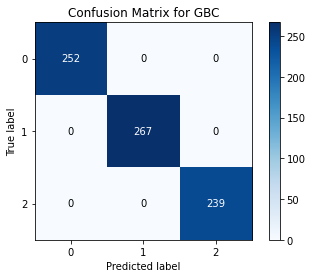

In [173]:
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=False, title = 'Confusion Matrix for GBC')

<AxesSubplot:title={'center':'ROC Plot for GBC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

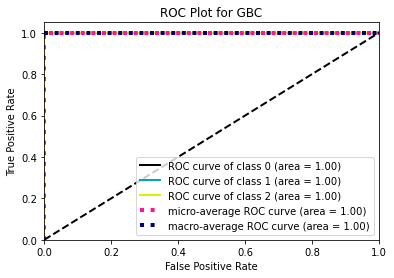

In [174]:
skplt.metrics.plot_roc(y_test, y_proba, title = 'ROC Plot for GBC')


<AxesSubplot:title={'center':'PR Curve for GBC'}, xlabel='Recall', ylabel='Precision'>

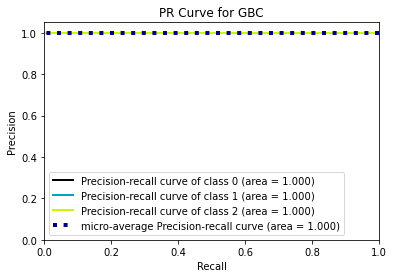

In [175]:
skplt.metrics.plot_precision_recall(y_test, y_proba, title = 'PR Curve for GBC')


In [176]:
fpr, tpr, thresholds = roc_curve(y_test, y_test, pos_label=2)
auc(fpr, tpr)

1.0

## K-Nearest Neighbors Classifier

Text(0.5, 1.0, 'Distribution of Object Predictions')

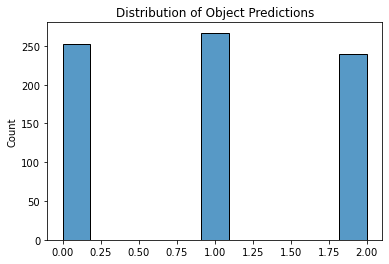

In [177]:
ax=sns.histplot(predictions)
ax.set_title("Distribution of Object Predictions")

In [178]:
'''knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train, y_train)
x_train.shape'''

(2274, 6)

In [179]:
y_test.shape

(758,)

In [180]:
'''
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)
# clf = LogisticRegression()
print(f'y_pred_test\t\t: {y_pred_test}')
print(f'y_test     \t\t: {y_train}')


print(f'Accuracy_train: {accuracy_score(y_test, y_pred_test):.4f}')
print(f'KNN accuracy_train: {knn.score(X_test, y_test)}')

print(f'Accuracy_train: {accuracy_score(y_train, y_pred_train):.4f}')
print(f'KNN accuracy_train: {knn.score(X_train, y_train)}')

print(f"F1 score: {f1_score(y_test, y_pred_test, average='micro')}")'''

y_pred_test		: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2

In [181]:
fpr, tpr, thresholds = roc_curve(y_test, y_test, pos_label=2)
auc(fpr, tpr)

1.0

In [182]:
'''prediction = []
for i in range(11):
    p = knn.predict(x_test[i].reshape(1,-1))
    prediction.append(p[0])

print(prediction)'''

'prediction = []\nfor i in range(11):\n    p = knn.predict(x_test[i].reshape(1,-1))\n    prediction.append(p[0])\n\nprint(prediction)'

In [183]:
with open('model.pkl', 'wb') as model_file:
  pickle.dump(gb_clf2, model_file)

In [184]:
loaded_model = pickle.load(open("model.pkl", 'rb'))
result = loaded_model.score(x_train, y_train)
print(result)

0.3051890941072999


In [185]:
'''x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train, y_train)
clf = LogisticRegression()
clf.fit(x_train, y_train)

print(knn.score(x_test, y_test))
print(clf.score(x_test, y_test))'''

'x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)\nknn = KNeighborsClassifier(n_neighbors=3)\n\nknn.fit(x_train, y_train)\nclf = LogisticRegression()\nclf.fit(x_train, y_train)\n\nprint(knn.score(x_test, y_test))\nprint(clf.score(x_test, y_test))'

In [186]:
'''prediction = []
for i in range(11):
    p = knn.predict(x_test[i].reshape(1,-1))
    prediction.append(p[0])

print(prediction)'''

'prediction = []\nfor i in range(11):\n    p = knn.predict(x_test[i].reshape(1,-1))\n    prediction.append(p[0])\n\nprint(prediction)'

In [187]:
# with open('model.pkl', 'wb') as model_file:
#   pickle.dump(knn, model_file)